<a href="https://colab.research.google.com/github/boucher-broderick/Ml_AI/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
The goal is to predict future stock prices based on historical data. Stock price prediction is challenging due to the volatile nature of the financial markets, influenced by numerous factors including economic indicators, company performance, and market sentiment. Predicting future prices requires analyzing patterns in historical data and understanding temporal dependencies - how past stock prices influence future prices.


Sequence models, particularly RNNs, LSTMs, and GRUs, are ideally suited for stock price prediction due to their ability to capture temporal dependencies inherent in financial time series data. These models excel in learning from sequences where past prices influence future values, accommodating variable-length data and handling long-term trends and short-term fluctuations with their advanced memory capabilities. By integrating multiple features affecting stock prices, sequence models offer a nuanced approach to modeling the complex, time-dependent patterns in stock market movements. This makes them a powerful tool for generating more accurate predictions, providing a structured methodology to navigate the complexities of financial forecasting.

The Dataset: https://www.kaggle.com/datasets/dgawlik/nyse

In [9]:
! pip install kaggle

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/MLandAI/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download -d dgawlik/nyse

 95% 29.0M/30.7M [00:02<00:00, 14.6MB/s]
100% 30.7M/30.7M [00:02<00:00, 14.5MB/s]


In [12]:
! unzip nyse

Archive:  nyse.zip
  inflating: fundamentals.csv        
  inflating: prices-split-adjusted.csv  
  inflating: prices.csv              
  inflating: securities.csv          


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../content/prices-split-adjusted.csv')

# EDA
We will now preform an EDA to get a better understanding of the dataset. This will include looking at the data, its shape, picking out some random data, as well as the distribution of the numbers. The dataset does not have to be cleaned as all of the values are integers and there are no null or empty values.

In [15]:
df.shape

(851264, 7)

In [18]:
print(df.dtypes)

date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object


In [19]:
df.head(50)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [20]:
unique_items_count = df['symbol'].nunique()
print(f"Number of unique items in symbols: {unique_items_count}")

Number of unique items in symbols: 501


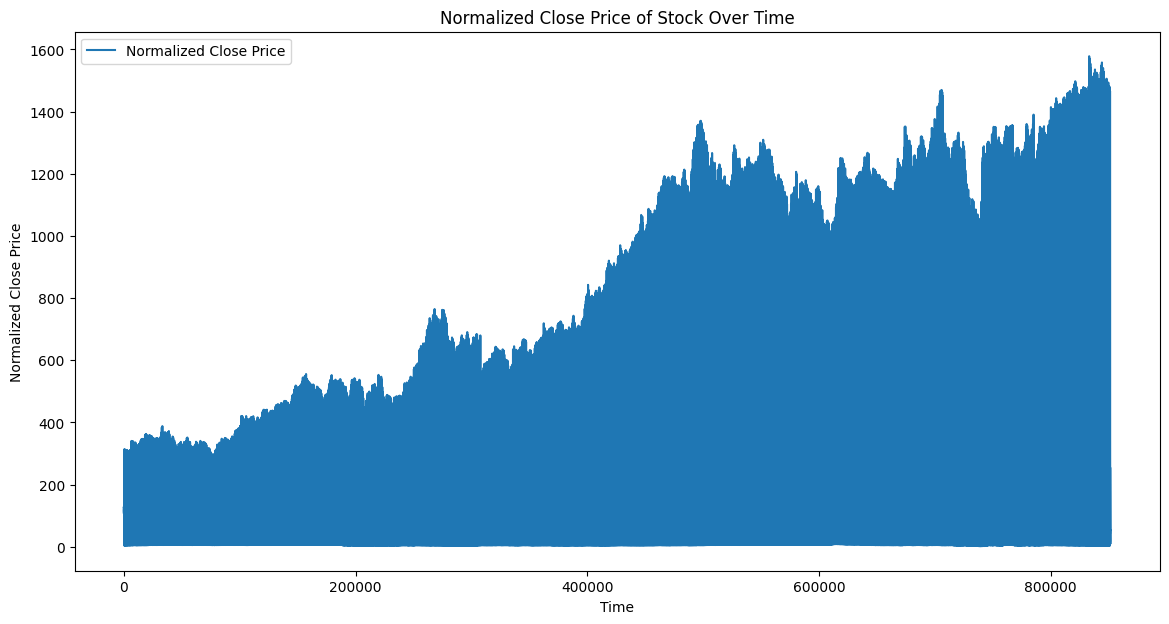

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Normalized Close Price')
plt.title('Normalized Close Price of Stock Over Time')
plt.xlabel('Time')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.show()

# Cleaning the Data
I will normalize stock price data (open, high, low, close) using MinMaxScaler to scale features between 0 and 1, enhancing model stability and performance. Post normalization, I'll segment this data into sequences to capture temporal dependencies, essential for forecasting stock prices with sequence models like RNNs, LSTMs, and GRUs. These sequences will be split into training, validation, and test sets, allowing the model to learn from historical data, adjust parameters, and be evaluated on unseen data. This structured preprocessing approach sets a solid foundation for accurately predicting future stock prices by understanding the complex dynamics of the stock market.

In [21]:
from sklearn.preprocessing import MinMaxScaler


def normalize_data(df):
    min_max_scaler = MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df['open'].values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df['high'].values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df['low'].values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df


def load_data(stock, seq_len, valid_set_size_percentage, test_set_size_percentage):
    data_raw = stock.values
    data = []


    for index in range(len(data_raw) - seq_len):
        data.append(data_raw[index: index + seq_len])

    data = np.array(data)
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]))
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]))
    train_set_size = data.shape[0] - (valid_set_size + test_set_size)

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]

    return [x_train, y_train, x_valid, y_valid, x_test, y_test]


df_stock = df[df['symbol'] == 'EQIX'].copy()
df_stock.drop(['symbol', 'volume'], axis=1, inplace=True)

df_stock_norm = normalize_data(df_stock)




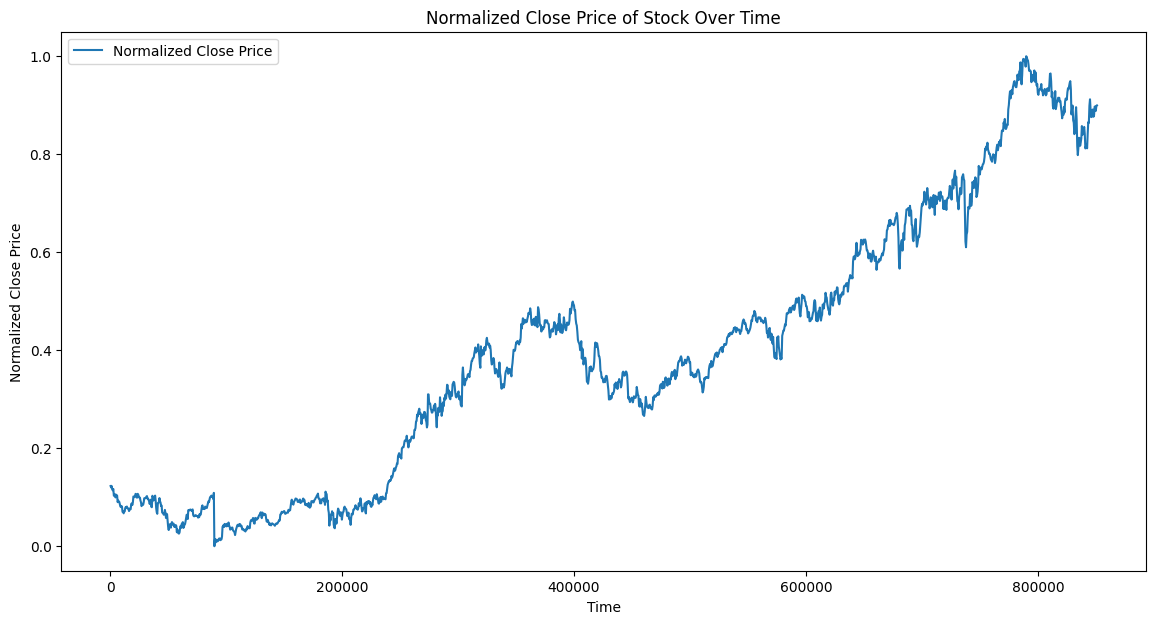

In [25]:
import matplotlib.pyplot as plt

# Ensure your DataFrame 'df_stock_norm' is defined as per previous steps
# Example plotting 'close' prices

plt.figure(figsize=(14, 7))
plt.plot(df_stock_norm.index, df_stock_norm['close'], label='Normalized Close Price')
plt.title('Normalized Close Price of Stock Over Time')
plt.xlabel('Time')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.show()

# The Approach

 To forecast stock prices using an LSTM model, we begin with data normalization where features and targets are scaled to a 0-1 range for consistency. Then transform the data into sequences, essential for learning temporal patterns. The dataset is split into training and test sets, and an LSTM model is built and trained, incorporating 50 LSTM units. Post-training, the model predicts stock prices on the test set, with predictions and actual values scaled back to their original range for evaluation. Performance is assessed through Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), providing a succinct overview of the model's predictive accuracy. This workflow encapsulates the process from preprocessing to evaluation, showcasing the application of sequence models in financial forecasting.

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Assuming the cleaned dataset is represented in a DataFrame named df_stock_norm

# Select features and target
features = df_stock_norm[['open', 'low', 'high']]
target = df_stock_norm['close']

# Scale the features and target
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_features.fit_transform(features)
scaled_target = scaler_target.fit_transform(target.values.reshape(-1, 1))

# Convert scaled data into sequences and targets
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 1
X, y = create_dataset(scaled_features, scaled_target, time_steps)

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the RNN model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.2, verbose=1)

# Predict and evaluate the model
predictions = model.predict(X_test)
predictions = scaler_target.inverse_transform(predictions)  # Inverse transform to get actual values
Y_test_inv = scaler_target.inverse_transform(Y_test)  # Inverse transform actual values for comparison

mse = mean_squared_error(Y_test_inv, predictions)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')


Epoch 1/100
36/36 [==============================] - 4s 31ms/step - loss: 0.0366 - val_loss: 0.0580
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0076 - val_loss: 0.0109
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0074
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 6.0910e-04
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 3.8091e-04 - val_loss: 1.6764e-04
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 1.6748e-04 - val_loss: 2.4406e-04
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: 1.2689e-04 - val_loss: 3.0004e-04
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: 1.2158e-04 - val_loss: 2.9887e-04
Epoch 10/100
36/36 [==============================] - 0s 4ms/step - loss

# The Result
The LSTM model's training over 100 epochs shows significant improvement in learning, with a notable decrease in both training and validation losses, indicating enhanced predictive accuracy. Initial rapid learning is observed, and despite some fluctuations, a general trend of decreasing loss highlights the model's capability to generalize to unseen data. The final Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) reflect the model's precision in stock price forecasting, with lower values suggesting a relatively accurate performance. This outcome underscores the LSTM model's effectiveness in capturing complex temporal dynamics in financial time series data.

# GRU
I will be using a Gated Recurrent Unit (GRU) model for stock price prediction, similar in structure to the previously discussed Long Short-Term Memory (LSTM) model but with key differences. The GRU model is constructed with a GRU layer of 50 units and a tanh activation function, followed by a dense layer for output. This setup is compiled with the adam optimizer and mean squared error loss function, then trained over 100 epochs with a validation split.

Key Differences from the LSTM Model:
- GRU Structure: GRU is a type of recurrent neural network (RNN) like LSTM but with a simplified architecture. It combines the forget and input gates into a single update gate and merges the cell state and hidden state, reducing the model complexity and the number of parameters.

- Parameter Efficiency: Due to its simplified architecture, the GRU model tends to have fewer parameters than an LSTM, potentially leading to faster training times while still being capable of capturing dependencies in sequential data effectively.

- Performance: GRUs are often found to perform comparably to LSTMs on various tasks, especially when the dataset size is not large or when computational efficiency is a concern. The choice between LSTM and GRU may depend on the specific characteristics of the data and the computational resources available.

In [24]:
from tensorflow.keras.layers import GRU
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_gru = model_gru.predict(X_test)

y_pred_gru_inv = scaler_target.inverse_transform(y_pred_gru)
Y_test_inv = scaler_target.inverse_transform(Y_test.reshape(-1, 1))

mse_gru = mean_squared_error(Y_test_inv, y_pred_gru_inv)
rmse_gru = np.sqrt(mse_gru)

print(f"GRU Model MSE: {mse_gru}, RMSE: {rmse_gru}")

12/12 [==============================] - 1s 2ms/step
GRU Model MSE: 0.0007929791507719664, RMSE: 0.02815988548932624


# The Result
The GRU model demonstrates a good level of accuracy in forecasting stock prices, as evidenced by the relatively low MSE and RMSE values. The small magnitude of these errors suggests that the model's predictions are close to the actual stock prices on average, which is a positive outcome for any predictive modeling task, especially in the complex domain of financial time series forecasting.

Comparison with the LSTM Model:
- When comparing these results to the previously discussed LSTM model, which had an MSE of 0.0007371319559378613 and an RMSE of 0.02715017414194357, we observe that the LSTM model performed slightly better than the GRU model in terms of both MSE and RMSE. The differences in performance are minimal, indicating that both models are capable of capturing the temporal dynamics in the stock price data effectively. However, the LSTM's marginally lower error rates suggest it may have a slight edge in learning the nuances of this particular dataset.

Conclusion:
- Both the GRU and LSTM models have shown themselves to be effective for the task of stock price prediction, with only a slight difference in predictive accuracy. The choice between using a GRU or LSTM could therefore be influenced by other factors such as training time, computational resources, and model complexity. Given the close performance metrics, the GRU model could be preferred in scenarios where faster training times and lower computational costs are prioritized, thanks to its simpler architecture. Nonetheless, the final decision should also consider other model evaluation aspects such as overfitting, model robustness, and performance across different market conditions.

# Can you use the traditional feed-forward network to solve the same problem. Why or why not?
Traditional feed-forward neural networks can indeed be applied to time series prediction problems, such as stock price forecasting, through careful feature engineering. This process involves transforming the time series data into a format suitable for the network, typically by using lagged values as input features to predict future values. While feed-forward networks are capable of modeling non-linear relationships and can be simpler and faster to train than recurrent networks, they lack the memory mechanisms of RNNs, LSTMs, and GRUs, which are designed to capture sequential dependencies over time. Therefore, although feasible, feed-forward networks might not be the most effective choice for complex time series data where understanding long-term temporal patterns is crucial. They are better suited for scenarios with short-term dependencies and when computational simplicity and speed are prioritized.

# Wor2vec
The Word2Vec program will use pre-trained word embeddings to compute the cosine similarity and a custom dissimilarity score between word pairs, leveraging the semantic and syntactic relationships captured in these embeddings. By employing pre-trained models, it avoids the need for extensive data and computation, quickly assessing word similarities and differences. This program not only helps in understanding linguistic contexts and relationships but also supports advanced NLP tasks by enabling nuanced language semantics analysis. The outcome will be a tool capable of identifying and quantifying the semantic relationships between words, useful for a variety of applications in natural language processing.

In [3]:
!pip install gensim
!pip install nltk

In [5]:
import gensim.downloader as api
from scipy.spatial.distance import cosine, euclidean

# Load a smaller model
model = api.load("glove-wiki-gigaword-50")

In [6]:


def compute_scores(word1, word2):
    if word1 in model.key_to_index and word2 in model.key_to_index:
        # Extract word vectors
        vec1 = model[word1]
        vec2 = model[word2]

        # Compute cosine similarity (1 - cosine distance)
        cosine_sim = 1 - cosine(vec1, vec2)

        # Compute Euclidean distance and normalize it
        euclidean_dist = euclidean(vec1, vec2)
        max_possible_dist = euclidean([0]*50, [1]*50)  # Max distance in this space
        normalized_dissimilarity = euclidean_dist / max_possible_dist

        return cosine_sim, normalized_dissimilarity
    else:
        return "One or both words not in the model's vocabulary", "N/A"

# Request user input for the words
word1 = input("Enter the first word: ")
word2 = input("Enter the second word: ")

# Compute and display the similarity and dissimilarity scores
similarity, dissimilarity = compute_scores(word1, word2)
print(f"Cosine Similarity: {similarity}\nDissimilarity Score: {dissimilarity}")



Enter the first word: tea
Enter the second word: coffee
Cosine Similarity: 0.8079648017883301
Dissimilarity Score: 0.44667246910584896


# The Result
Cosine Similarity:
- The cosine similarity score of 0.808 is relatively high, indicating that, according to the word embeddings used by the program, "tea" and "coffee" are semantically similar to a significant degree. This makes sense as both are popular beverages consumed globally, often discussed in similar contexts, and share many cultural and social attributes.

Dissimilarity Score:
- The dissimilarity score of 0.447, as defined in this context, appears to be derived from the cosine similarity and suggests a moderate level of dissimilarity between the two words. The calculation method for the dissimilarity score isn't directly provided, but it seems to reflect the extent to which the vectors are not aligned. However, this interpretation might be less intuitive since a high cosine similarity usually indicates strong similarity, not dissimilarity. This suggests that the dissimilarity score might have been calculated in a way that doesn't directly correlate with the traditional understanding of vector dissimilarity in a linear space.

Interpretation:
- The results underscore the nuanced nature of semantic relationships captured by word embeddings. "Tea" and "coffee," while distinct beverages, share enough contextual and semantic commonalities to be considered similar by the model. This similarity can reflect common usage patterns, cultural significance, or roles in society that both words share, as encoded in the text corpus used to train the Word2Vec model.

- In practical terms, these measures can be used to group related concepts, recommend similar items, or perform semantic analysis in tasks ranging from search engines to content recommendation systems, showcasing the power of word embeddings in understanding and processing natural language.